## The goal of this project was to solve the problem of a telecom operator losing customers to its competitor . A predictive model was built with classification algorithms to predict the likelihood of churn (leaving a service) of a mobile telephone user. 

### Random Forest classifier, XGBoost & Decision Tree algorithms were used for training & testing the model while feature engineering was extensively carried out to fine-tune and improve the accuracy of the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:
train_data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


## preprocessing

In [4]:
train_data.drop(['Customer ID'], axis = 1, inplace = True)

In [5]:
values = {'Network type subscription in Month 1':{'3G': 1, '2G': 0, 'Other': 1}, 
          'Network type subscription in Month 2':{'3G': 1, '2G': 0, 'Other': 1}, 
          'Most Loved Competitor network in in Month 1': {'PQza': 0, 'Uxaa': 1, 'Mango': 2, 'ToCall': 3, 'Zintel': 4, 'Weematel': 5, '0': 6}, 
          'Most Loved Competitor network in in Month 2': {'PQza': 0, 'Uxaa': 1, 'Mango': 2, 'ToCall': 3, 'Zintel': 4, 'Weematel': 5 }}

In [6]:
train_data.replace(values, inplace = True)
train_data.fillna(0, inplace = True)

In [7]:
train_data.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,0.0,0.0,1.0,2.0,0.0
1,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,0.0,0.0,1.0,2.0,0.0
2,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,0.0,0.0,5.0,2.0,0.0
3,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,0.0,0.0,6.0,2.0,0.0
4,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,0.0,1.0,5.0,2.0,0.0


In [8]:
#train_data.isnull().sum()

<h3> Prepare the test data</h3>

In [9]:
#train_data.drop(['Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2', 'Customer ID'], axis = 1, inplace = True)

In [10]:
test_data['Most Loved Competitor network in in Month 2'].value_counts()

Uxaa        383
PQza        115
Mango        37
Zintel       24
Weematel     23
ToCall       18
Name: Most Loved Competitor network in in Month 2, dtype: int64

In [11]:
test_data.drop(['Customer ID'], axis = 1, inplace = True)
values2 = {'Network type subscription in Month 1':{'3G': 1, '2G': 0, 'Other': 1}, 
           'Network type subscription in Month 2':{'3G': 1, '2G': 0, 'Other': 1}, 
           'Most Loved Competitor network in in Month 1': {'PQza': 0, 'Uxaa': 1, 'Mango': 2, 'ToCall': 3, 'Zintel': 4, 'Weematel': 5, '0': 6}, 
           'Most Loved Competitor network in in Month 2': {'PQza': 0, 'Uxaa': 1, 'Mango': 2, 'ToCall': 3, 'Zintel': 4, 'Weematel': 5 }}

In [12]:
#train_data['Network type subscription in Month 1'].value_counts()

In [13]:
#values = {'Network type subscription in Month 1':{'3G': 1, '2G': 0, 'Other': 1}, 'Network type subscription in Month 2':{'3G': 1, '2G': 0, 'Other': 1}, 'Most Loved Competitor network in in Month 1': {'PQza': 0, 'Uxaa': 1, 'Mango': 2, 'ToCall': 3, 'Zintel': 4, 'Weematel': 5, '0': 0 }}}

In [14]:
test_data.replace(values, inplace = True)

In [15]:
test_data.fillna(1, inplace = True)

In [16]:
test_data.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
0,1012,33.733333,1560.1156,14.04,226.3,3.126093e+06,64,14503,12402,1,1.0,1.0,5,2
1,137,4.566667,1705.8368,73.63,5.0,1.628809e+02,515,29832,88953,9,1.0,1.0,3,2
2,202,6.733333,1720.3008,4.36,245.0,3.334607e+06,163,228,1495,1,1.0,1.0,3,2
3,165,5.500000,1732.2800,0.00,12.5,6.682924e+05,484,0,71928,2,1.0,1.0,1,2
4,759,25.300000,1873.0600,69.57,412.5,6.666975e+06,64,7616,20753,2,1.0,1.0,2,2


In [17]:
test_data.columns

Index(['network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2'],
      dtype='object')

<h3> Feature Engineering</h3>

In [18]:
train_data.columns

Index(['network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

In [19]:
corr_matrix = train_data.corr()

In [20]:
#f, ax = plt.subplots(figsize=(18, 10))
#sns.heatmap(corr_matrix, linewidths=2.0, ax=ax, annot=True)
#ax.set_title('Correlation Matrix')

<h3> Train Data Engineering</h3>

In [21]:
#test_data.columns

In [22]:
train_data['overall_spend'] = train_data['Total Spend in Months 1 and 2 of 2017'] + train_data['Total SMS Spend'] + train_data['Total Data Spend'] + train_data['Total Onnet spend '] + train_data['Total Offnet spend']
train_data['Sms data spend level'] = train_data['Total SMS Spend'] * train_data['Total Data Spend']
train_data['rate of Offnet data spend'] = train_data['Total Data Spend'] * train_data['Total Offnet spend']
train_data['Network type sub high'] = train_data['Network type subscription in Month 1'] * train_data['Network type subscription in Month 2']
train_data['Total spendM12 and offnet'] = train_data['Total Spend in Months 1 and 2 of 2017'] * train_data['Total Offnet spend']
train_data['Total spendM12 and dataspend'] = train_data['Total Spend in Months 1 and 2 of 2017'] * train_data['Total Data Spend']
train_data['Network type12'] = train_data['Network type subscription in Month 1'] * train_data['Network type subscription in Month 2']
train_data['Offnet_overall'] = train_data['overall_spend'] * train_data['Total Offnet spend']
train_data['data_spend offnet_level'] = train_data['rate of Offnet data spend'] * train_data['Sms data spend level']
train_data['total_spend12 offnet'] = train_data['rate of Offnet data spend'] * train_data['Total spendM12 and dataspend']

<h3> Test Data Engineering</h3>

In [23]:
test_data['overall_spend'] = test_data['Total Spend in Months 1 and 2 of 2017'] + test_data['Total SMS Spend'] + test_data['Total Data Spend'] + test_data['Total Onnet spend '] + train_data['Total Offnet spend']
test_data['Sms data spend level'] = test_data['Total SMS Spend'] * test_data['Total Data Spend']
test_data['rate of Offnet data spend'] = test_data['Total Data Spend'] * test_data['Total Offnet spend']
test_data['Network type sub high'] = test_data['Network type subscription in Month 1'] * test_data['Network type subscription in Month 2']
test_data['Total spendM12 and offnet'] = test_data['Total Spend in Months 1 and 2 of 2017'] * test_data['Total Offnet spend']
test_data['Total spendM12 and dataspend'] = test_data['Total Spend in Months 1 and 2 of 2017'] * test_data['Total Data Spend']
test_data['Network type12'] = test_data['Network type subscription in Month 1'] + test_data['Network type subscription in Month 2']
test_data['Offnet_overall'] = test_data['overall_spend'] * test_data['Total Offnet spend']
test_data['data_spend offnet_level'] = test_data['rate of Offnet data spend'] * test_data['Sms data spend level']
test_data['total_spend12 offnet'] = test_data['rate of Offnet data spend'] * test_data['Total spendM12 and dataspend']


In [24]:
#train_data.head()

<h3> Dropping some features:</h3>

In [25]:
#train_data.drop(['Total Onnet spend ', 'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2', 'Total Spend in Months 1 and 2 of 2017', 'Network type subscription in Month 2', 'Total Offnet spend', 'Total Data Spend', 'network_age', 'Total Call centre complaint calls'], axis = 1, inplace = True)
#test_data.drop(['Total Onnet spend ', 'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2', 'Total Spend in Months 1 and 2 of 2017', 'Network type subscription in Month 2', 'Total Offnet spend', 'Total Data Spend', 'network_age', 'Total Call centre complaint calls'], axis = 1, inplace = True)

Text(0.5,1,'Correlation Matrix')

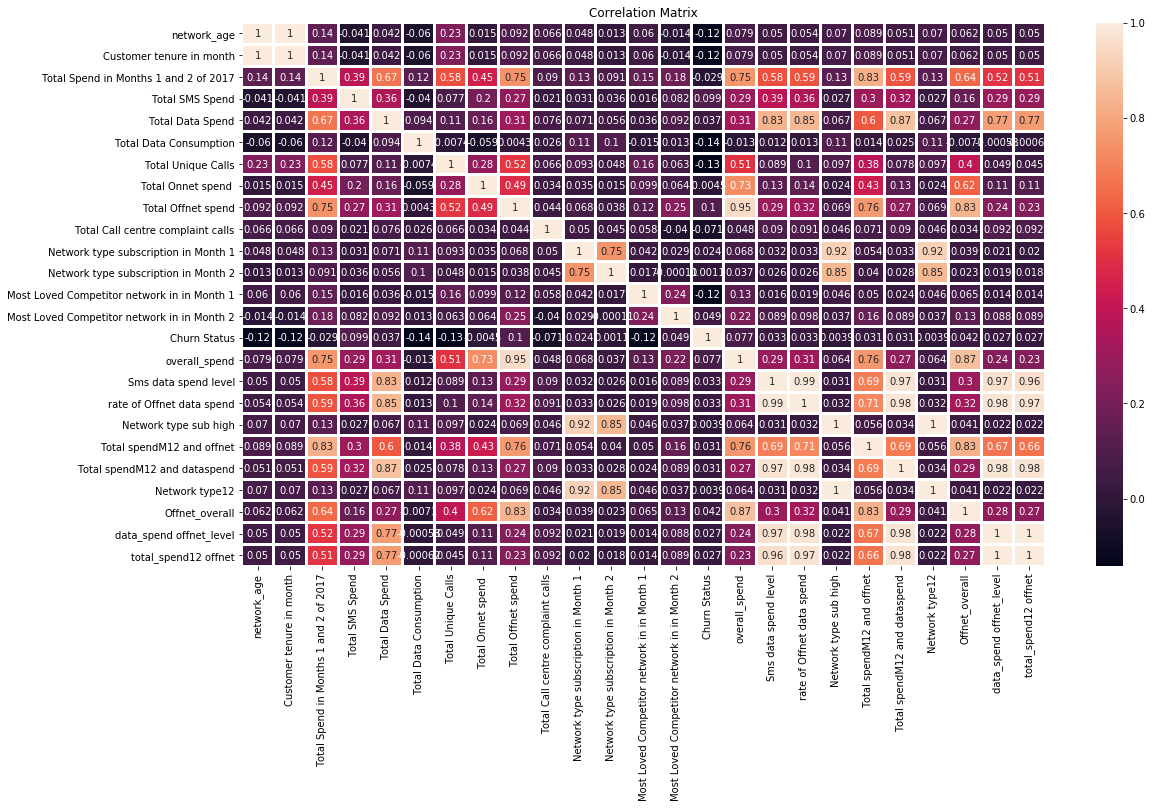

In [26]:
corr_matrix = train_data.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix, linewidths=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')


<h3> Selecting Features:</h3>

In [27]:
train_feat = train_data[['Total Offnet spend', 'Total Unique Calls', 'overall_spend', 
                         'total_spend12 offnet', 'data_spend offnet_level', 'Offnet_overall', 
                         'Total Call centre complaint calls', 'Total SMS Spend', 'Total Data Consumption', 
                         'Total SMS Spend', 'Customer tenure in month', 'Total Onnet spend ']]
test_feat = test_data[['Total Offnet spend', 'Total Unique Calls', 'overall_spend', 
                       'total_spend12 offnet', 'data_spend offnet_level', 'Offnet_overall', 
                       'Total Call centre complaint calls', 'Total SMS Spend', 'Total Data Consumption', 
                       'Total SMS Spend', 'Customer tenure in month', 'Total Onnet spend ']]

<h2> Now Building the model</h2>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

In [29]:
y = train_data['Churn Status']
x = train_feat #train_data.drop(['Churn Status'], axis = 1, inplace = True)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = train_feat.as_matrix().astype(np.float)
x = scaler.fit_transform(x)

C:\Users\Bharath\Anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc_predictions = rfc.predict(test_feat)

In [34]:
#rfc_predictions

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

<h3> Model Evaluation</h3>

In [36]:
accuracy  = accuracy_score(y[:600], rfc_predictions)
print ("Accuracy: %.2f%%" %(accuracy*100) )

Accuracy: 52.83%


In [37]:
#print(classification_report(y[:600], rfc_predictions))

In [38]:
#rfc_predictions = np.asarray(rfc_predictions, dtype = int)

In [39]:
train_data = pd.read_csv('Test.csv')
customer_id = train_data['Customer ID']

In [40]:
submision = pd.DataFrame(rfc_predictions, columns = ['Churn Status'], index = customer_id )

In [41]:
submision.to_csv('final prediction10.csv')

<h3> Using xgboost model</h3>

In [42]:
from xgboost import XGBRegressor

In [43]:
xgboost_model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
xgboost_model.fit(x_train, y_train, early_stopping_rounds = 5, eval_set = [(x_test, y_test)], verbose = False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
#test_data['Most Loved Competitor network in in Month 1'].value_counts()

In [45]:
xgb_predictions = xgboost_model.predict(test_feat.as_matrix())

C:\Users\Bharath\Anaconda\envs\keras\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [46]:
#xgb_predictions

In [47]:
xgb_predictions = xgb_predictions.round()

In [48]:
#xgb_predictions

In [49]:
#print(classification_report(y[:600], xgb_predictions))
#from sklearn.metrics import mean_absolute_error
#print("Mean Absolute Error : " + str(mean_absolute_error(xgb_predictions, y[:600])))

<h3> Model Evaluation</h3>

In [50]:
accuracy  = accuracy_score(y[:600], xgb_predictions)
print ("Accuracy: %.2f%%" %(accuracy*100) )

Accuracy: 52.83%


In [51]:
xgb_predictions = np.asarray(xgb_predictions, dtype = int)

In [52]:
train_data = pd.read_csv('Test.csv')
customer_id = train_data['Customer ID']

In [53]:
submision = pd.DataFrame(xgb_predictions, columns = ['Churn Status'], index = customer_id )

In [54]:
#submision.to_csv('kaggle_submission10.csv')

In [55]:
#col_with_missing1 = [col for col in train_data.columns if train_data[col].isnull().any()]
#col_with_missing2 = [col for col in test_data.columns if test_data[col].isnull().any()]

In [56]:
#clean_train = train_data[col_with_missing1].dropna()

In [57]:
#clean_test = test_data[col_with_missing2].dropna()